<H2>Experiment</H2>
<H5>1. analysis of quality to the date before AI started (the end of 2019)</H5>
<H5>2. analysis of quality to the present without AI roads</H5>
<H5>3. analysis of quality to the present including AI roads</H5>
<H5>Is there improvement in quality since 2020?</H5>
<H5>Is improvement different (better?) with AI mapping than without it?</H5>

<p>Buildings:</p>
<p>"MappingSaturation", "building_count"</p>
<p>"BuildingCompleteness", "building_area"</p>
<p>"GhsPopComparisonBuildings", "building_count"</p>

<p>Roads:</p>
<p>"MappingSaturation", "major_roads_length"</p>
<p>"GhsPopComparisonRoads", "major_roads_length"</p>
<br></br>
<p>"Currentness" or "TagsRatio" were not selected.</p>










<H3>1. analysis of quality to the date before AI started (the end of 2019)</H3>
<p>"MappingSaturation", "major_roads_length"</p>

In [22]:
import json
import requests
from datetime import datetime

base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys_ohs = json.load(file)
bpolys_ohs ="34.40503165,-4.2800038,34.4226,-4.2800038,34.4226,-4.2698,34.40503165,-4.2698,34.40503165,-4.2800038"

parameters = {
    #"bpolys": json.dumps(bpolys_ohs),  # pass GeoJSON as string.
    #OR
    "bpolys": bpolys_ohs,
    "filter": "highway=motorway or highway=trunk or highway=primary or highway=secondary or highway=tertiary or highway=unclassified or highway=motorway_link or highway=trunk_link or highway=primary_link or highway=secondary_link or highway=tertiary_link",
    "format": "json",
    "time": "/2020-01-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

#print("Response:")
#print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]
print(result)

[{'timestamp': '2007-10-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2007-11-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2007-12-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-01-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-02-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-03-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-04-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-05-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-06-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-07-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-08-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-09-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-10-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-11-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2008-12-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2009-01-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2009-02-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2009-03-08T00:00:00Z', 'value': 0.0}, {'timestamp': '2009-04-08T00:00:00Z', 'value'

Analysis of quality to the date before AI started (the end of 2019).
{
    "description": "The saturation of the last 3 years is 96.83%.\nSaturation is in progress (30% < Saturation \u2264 97%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2019-12-08T00:00:00+00:00",
    "value": 0.968321665650771,
    "label": "yellow",
    "class": 3
}


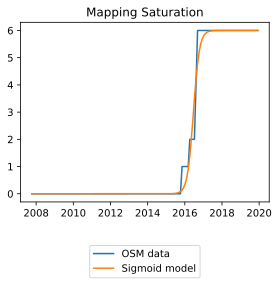

In [23]:
#import json
#import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys_oqt = json.load(file)
#OR
bpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

layer = {
    "name": "",
    "description": "",
    "data": {
          "result":result
          }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys_oqt,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": False
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the date before AI started (the end of 2019).")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>2. analysis of quality to the present without AI buildings</H3>
<p>1. ohsome - state in 2019. </p>
<p> "groupByKey": "source",</p>
<p> "groupByValues": "microsoft/BuildingFootprints",</p>
<p>Selected AI buildings. Remainder is what I need.</p> 
<p>2. OQT - using result from ohsome</p>
<p>It works, but I have problem to get Remainder from ohsome to oqt.</p>


In [24]:
import json
import requests
from datetime import datetime

base_url = "https://api.ohsome.org/v1"
#endpoint = "/elements/count"
#endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
endpoint = "/elements/count/groupBy/tag"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys_ohs = json.load(file)
bpolys_ohs ="34.40503165,-4.2800038,34.4226,-4.2800038,34.4226,-4.2698,34.40503165,-4.2698,34.40503165,-4.2800038"
#bpolys_ohs ="30.0,-6.0,31.0,-6.0,31.0,-4.0,30.0,-4.0,30.0,-6.0"

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bpolys": bpolys_ohs,
    "filter": "highway=motorway or highway=trunk or highway=primary or highway=secondary or highway=tertiary or highway=unclassified or highway=motorway_link or highway=trunk_link or highway=primary_link or highway=secondary_link or highway=tertiary_link", 
    "groupByKey": "source",
    "groupByValues": "maxar",
    "format": "json",
    "time": "/2023-04-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

#print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

preresult = response.json()["groupByResult"]

result=""
for value in preresult:     #finds remainder and writes his "result" as result for next cell 
    pom=value["groupByObject"]
    if (pom=="remainder"):
        result=value["result"]

print(result)        


{
    "attribution": {
        "url": "https://ohsome.org/copyrights",
        "text": "\u00a9 OpenStreetMap contributors"
    },
    "apiVersion": "1.9.0",
    "groupByResult": [
        {
            "groupByObject": "remainder",
            "result": [
                {
                    "timestamp": "2007-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-03-08T00:00:00Z",
                    "value": 0.0
 

Analysis of quality to the present without AI buildings
{
    "description": "The saturation of the last 3 years is 100.0%.\nHigh saturation has been reached (97% < Saturation \u2264 100%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2023-03-08T00:00:00+00:00",
    "value": 1.0,
    "label": "green",
    "class": 5
}


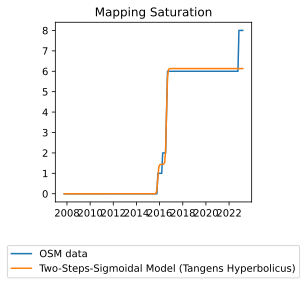

In [25]:
#import json
#import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys_oqt = json.load(file)
#OR
#bpolys_oqt = {
#    "type": "Feature",
#    "geometry": {
#      "type": "Polygon",
#      "coordinates": [
#        [
#          [34.40503165,-4.2800038],
#          [34.4226,-4.2800038],
#          [34.4226,-4.2698],
#          [34.40503165,-4.2698],
#          [34.40503165,-4.2800038]
#        ]
#      ]
#    }
#}

#with open("xxx.geojson", "r") as file:
#    bpolys_oqt = json.load(file)
#OR
bpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}
#          [30.0,-6.0],
#          [31.0,-6.0],
#          [31.0,-4.0],
#          [30.0,-4.0],
#          [30.0,-6.0]

layer = {
    "name": "",
    "description": "",
    "data": {
    "result": result
    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys_oqt,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": False
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the present without AI roads")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>3. analysis of quality to the present including AI buildings</H3>


{'metadata': {'name': 'Mapping Saturation', 'description': 'Calculate if mapping has saturated.\nHigh saturation has been reached if the growth of the fitted curve is minimal.\n'}, 'layer': {'key': 'major_roads_length', 'name': 'Major Roads Length', 'description': 'The road network defined by all objects which hold the principal tags for\nthe road network and their link roads as defined in the OSM Wiki`:`\nhttps://wiki.openstreetmap.org/wiki/Key:highway\n'}, 'result': {'description': 'The saturation of the last 3 years is 57.89%.\nSaturation is in progress (30% < Saturation ≤ 97%).\n', 'timestamp_oqt': '2023-04-26T15:36:50.039264+00:00', 'timestamp_osm': '2023-04-01T00:00:00+00:00', 'value': 0.5788800252659958, 'label': 'yellow', 'class': 3}}
Analysis of quality to the present including AI roads
{
    "description": "The saturation of the last 3 years is 57.89%.\nSaturation is in progress (30% < Saturation \u2264 97%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "t

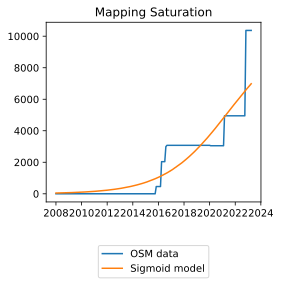

In [26]:
import json
import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys_oqt = json.load(file)
#OR
bpolys_oqt = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

#          [30.0,-6.0],
#          [31.0,-6.0],
#          [31.0,-4.0],
#          [30.0,-4.0],
#          [30.0,-6.0]


parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys_oqt,
  "layerKey": "major_roads_length",
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False,
  "includeData": False
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
print(properties)
print("Analysis of quality to the present including AI roads")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))